In [18]:
import numpy as np
import cv2 # opencv
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from keras.models import load_model
from PIL import Image

In [19]:
import mtcnn
# print version
print(mtcnn.__all__)

['MTCNN']


In [20]:
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # deal with negative pixel index
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

In [21]:
face = extract_face('stroke3.jpg')

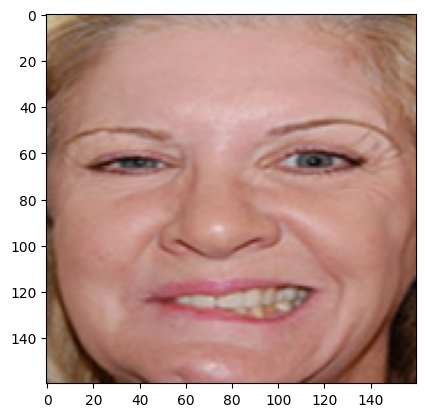

In [22]:
plt.imshow(face)

In [23]:
first_half = face[:,:80]
second_half = face[:,80:]

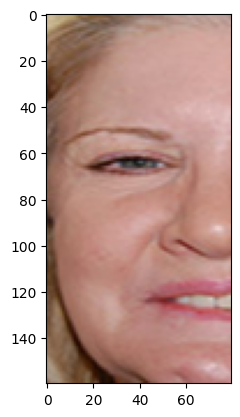

In [24]:
plt.imshow(first_half)

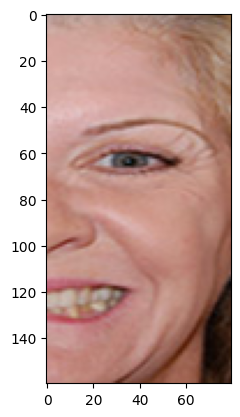

In [25]:
plt.imshow(second_half)

In [26]:
first_half_flip = cv2.flip(first_half,1)

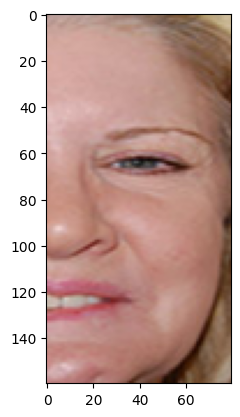

In [27]:
plt.imshow(first_half_flip)

In [28]:
first_half_joined = np.hstack((first_half, first_half_flip))

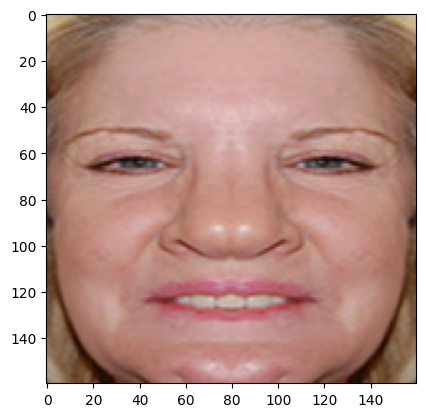

In [29]:
plt.imshow(first_half_joined)

In [30]:
second_half_flip = cv2.flip(second_half,1)

In [31]:
second_half_joined = np.hstack((second_half_flip,second_half))

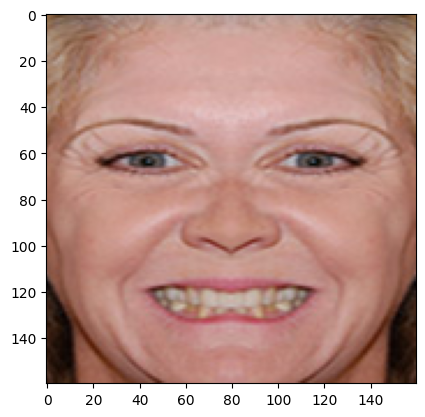

In [32]:
plt.imshow(second_half_joined)

In [33]:
from keras_facenet import FaceNet
embedder = FaceNet()

In [34]:
embedding_first = embedder.embeddings([first_half_joined])
embedding_second = embedder.embeddings([second_half_joined])

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


In [35]:
euclidean_distance = np.linalg.norm(embedding_first - embedding_second)

In [36]:
from scipy.spatial.distance import cosine
cosine_distance = cosine(embedding_first[0], embedding_second[0])

In [37]:
print(euclidean_distance,cosine_distance)

1.1440604 0.6544369069077423


In [41]:
plt.imsave("test_out.jpg",first_half_joined)